In [71]:
# Step 1: Prepare Data:

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
df = pd.read_csv('/content/Infectious Disease 2001-2014.csv')

# Display the first few rows to get an overview
df.head()

,Disease,County,Year,Sex,Count,Population,Rate,CI.lower,CI.upper,Unstable
0,Amebiasis,California,2001,Total,571,34514777,1.654,1.521,1.796,
1,Amebiasis,California,2001,Female,176,17340743,1.015,0.871,1.176,
2,Amebiasis,California,2001,Male,365,17174034,2.125,1.913,2.355,
3,Amebiasis,California,2002,Total,442,34940334,1.265,1.150,1.389,
4,Amebiasis,California,2002,Female,145,17555714,0.826,0.697,0.972,


In [56]:
# Step 2: Gather Necessary Data:

# Select relevant columns
selected_columns = ['Disease', 'Year', 'Count', 'Population', 'Rate', 'Sex']
df = df[selected_columns]

# Filter data based on your analysis requirements (example filter by Disease)
filtered_data = df[df['Disease'] == 'Your_Target_Disease']


In [3]:
# step 3: Handle Categorical and Missing Data:

# Handle categorical data (example: 'Sex' column)
df = pd.get_dummies(df, columns=['Sex'])

# Handling missing data (e.g., filling missing values with mean for 'Rate' column)
df['Rate'].fillna(df['Rate'].mean(), inplace=True)

In [69]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.061080547326844405


Step 4: Provide Insight into the Methods I chose and why I chose them:

 Data Preparation Explanation:
 We selected the columns 'Disease', 'Year', 'Count', 'Population', 'Sex 'and 'Rate' as they are essential for our analysis.

 For the 'Sex' column, we performed one-hot encoding to convert it into numerical form, making it suitable for analysis.

 For missing data in the 'Rate' column, we imputed the missing values with the mean to ensure that we retain as much data as possible for analysis.


**Data Analyzing and Visualizing**


<ipython-input-22-d276b2450cc3>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Year', y='Rate', hue='Sex', ci=None)


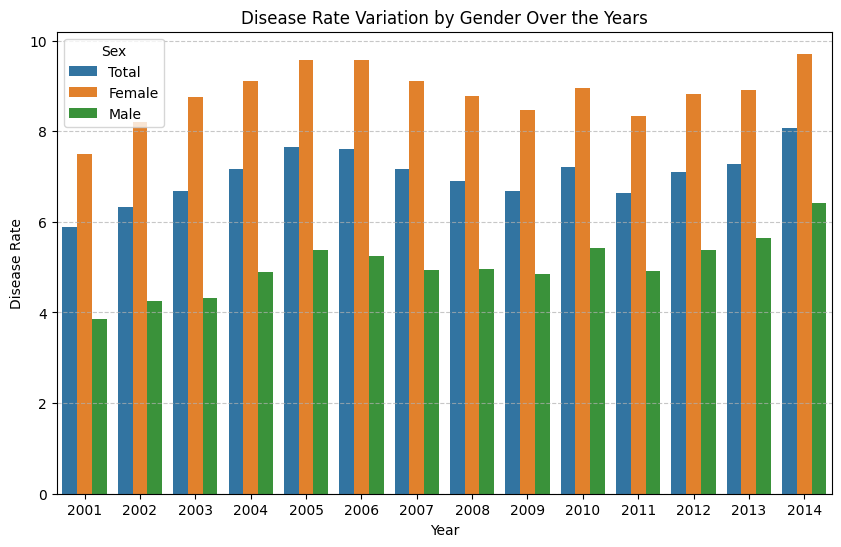

In [22]:
# How does the disease rate vary by gender over the years?

# Create a bar plot to compare disease rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Year', y='Rate', hue='Sex', ci=None)
plt.title('Disease Rate Variation by Gender Over the Years')
plt.xlabel('Year')
plt.ylabel('Disease Rate')
plt.legend(title='Sex')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

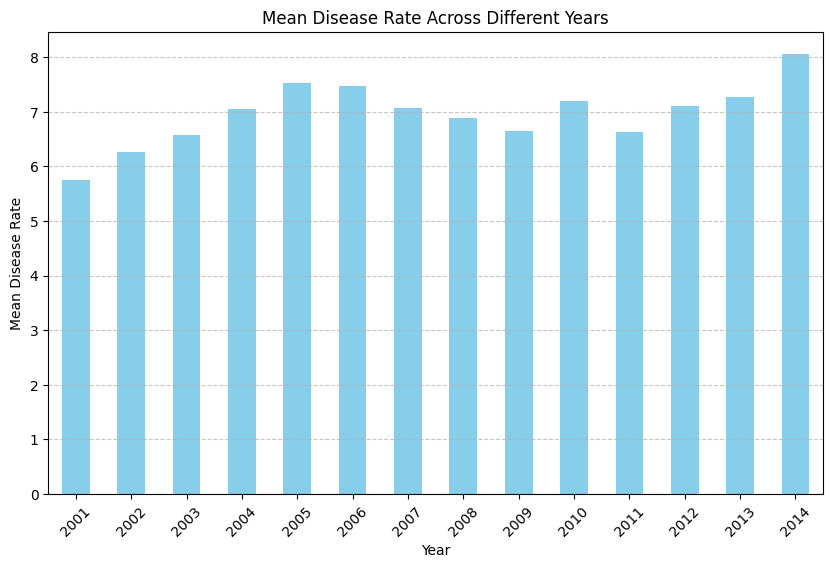

In [23]:
#  What is the distribution of disease rates across different years?

# Group data by year and calculate the mean disease rate
yearly_mean_rate = df.groupby('Year')['Rate'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
yearly_mean_rate.plot(kind='bar', color='skyblue')
plt.title('Mean Disease Rate Across Different Years')
plt.xlabel('Year')
plt.ylabel('Mean Disease Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

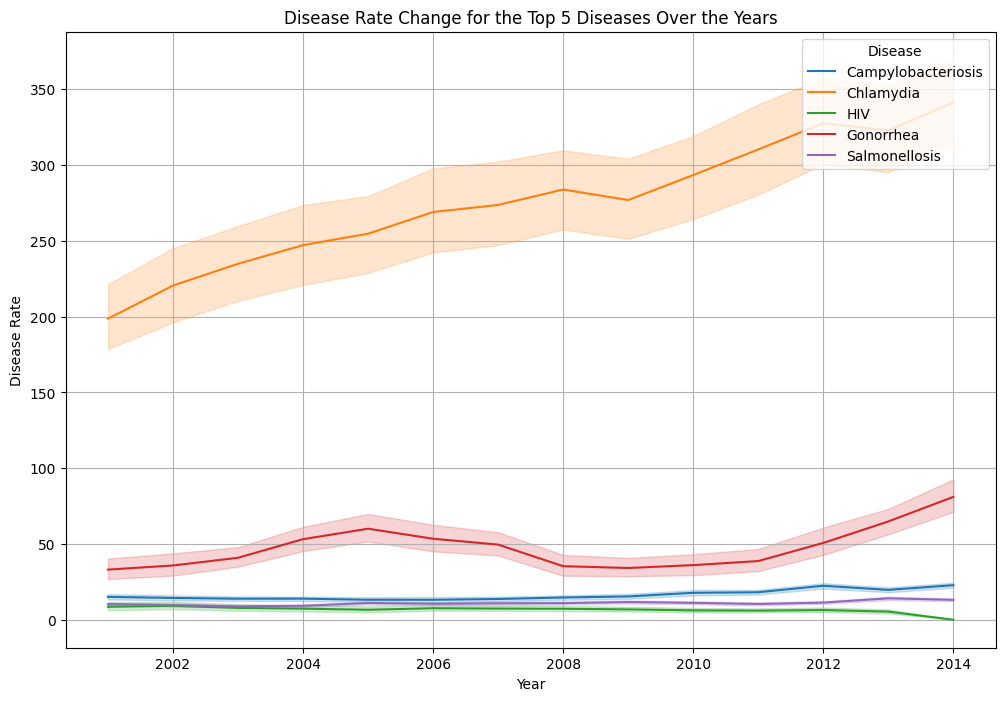

In [24]:
# How have disease rates changed for the top 5 diseases with the highest counts?

# Group data by disease and calculate the total count for each disease
top_diseases = df.groupby('Disease')['Count'].sum().sort_values(ascending=False).head(5).index

# Filter data for the top 5 diseases
top_diseases_data = df[df['Disease'].isin(top_diseases)]

# Create a line plot to visualize the change in disease rates
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_diseases_data, x='Year', y='Rate', hue='Disease', markers=True)
plt.title('Disease Rate Change for the Top 5 Diseases Over the Years')
plt.xlabel('Year')
plt.ylabel('Disease Rate')
plt.legend(title='Disease', loc='upper right')
plt.grid(True)
plt.show()



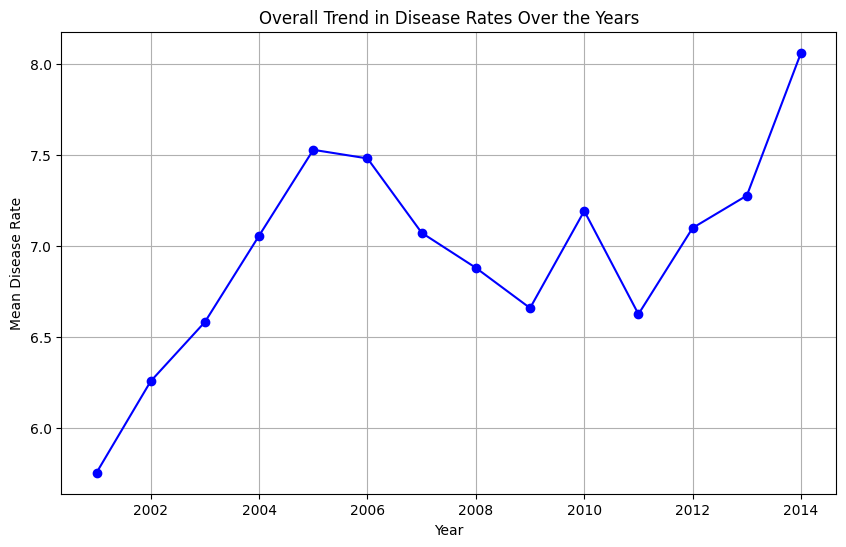

In [25]:
# What is the overall trend in disease rates over the years for all data in the dataset?

# Group data by year and calculate the mean disease rate for each year
yearly_mean_rate = df.groupby('Year')['Rate'].mean()

# Create a line plot to visualize the trend in disease rates over the years
plt.figure(figsize=(10, 6))
yearly_mean_rate.plot(kind='line', color='blue', marker='o', linestyle='-')
plt.title('Overall Trend in Disease Rates Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Disease Rate')
plt.grid(True)
plt.show()



 machine learning model for binary classification using logistic regression.

In [94]:

# Select relevant columns for features (X) and target (y)
X = df.drop(columns=['Disease'])
y = df['Disease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for categorical and numeric columns
numeric_features = ['Year', 'Rate']  # Numeric features
categorical_features = ['Sex']       # Categorical features

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())      # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())       # One-hot encode categorical features
])

# Combine preprocessing for both numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline for preprocessing and modeling
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000))])

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)
confusion_mat = confusion_matrix(y_test, y_pred)


In [107]:
# Question: "Can we predict the probability of a specific individual getting infected with 'Your_Target_Disease' based on their characteristics? How can this information be used for targeted interventions?"

sample_data = {
    'Year': [2010],           # Replace with the desired year
    'Rate': [0.05],           # Replace with the desired rate
    'Sex': ['Male']           # Replace with the desired gender
}

# Create a DataFrame from the sample data
sample_df = pd.DataFrame(sample_data)

# Use the trained model to predict the probability of infection
predicted_probabilities = model.predict_proba(sample_df)

# Extract the probability of getting infected with 'Your_Target_Disease'
probability_of_infection = predicted_probabilities[:, 1]

# Print the probability of infection
print("Probability of Infection:", probability_of_infection)


Probability of Infection: [0.02026025]


In [108]:
# Question: "Given a set of demographic and health data for a specific population, can we predict the risk of an outbreak of 'Your_Target_Disease' in the next year? How can this prediction inform public health planning?"
sample_data = {
    'Year': [2023],           # Replace with the desired year for prediction
    'Rate': [0.08],           # Replace with the desired rate
    'Sex': ['Female']         # Replace with the desired gender
}
# Create a DataFrame from the sample data
sample_df = pd.DataFrame(sample_data)

# Use the trained model to predict the likelihood of an outbreak
outbreak_threshold = 0.5  # Adjust the threshold as needed
predicted_probabilities = model.predict_proba(sample_df)

# Check if the predicted probability exceeds the outbreak threshold
predicted_probability_of_outbreak = predicted_probabilities[:, 1]

if predicted_probability_of_outbreak >= outbreak_threshold:
    print("There is a high risk of an outbreak.")
else:
    print("The risk of an outbreak is low.")

# Print the predicted probability of an outbreak
print("Predicted Probability of Outbreak:", predicted_probability_of_outbreak)

The risk of an outbreak is low.
Predicted Probability of Outbreak: [0.00068522]
